# 🍇 군집화

## 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [1]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

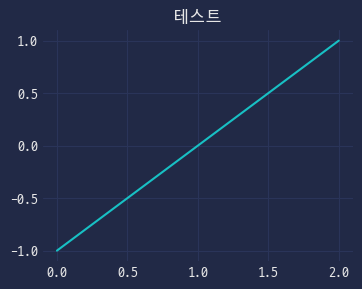

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

## 📦 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [3]:
# 3개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=3.0,
                    random_state=42)

print(features.shape, targets.shape)

(200, 2) (200,)


In [4]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,10.237202,3.394668,1
1,-10.368433,11.479994,0
2,-6.916368,-9.571873,2


In [5]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
1    67
0    67
2    66
Name: count, dtype: int64

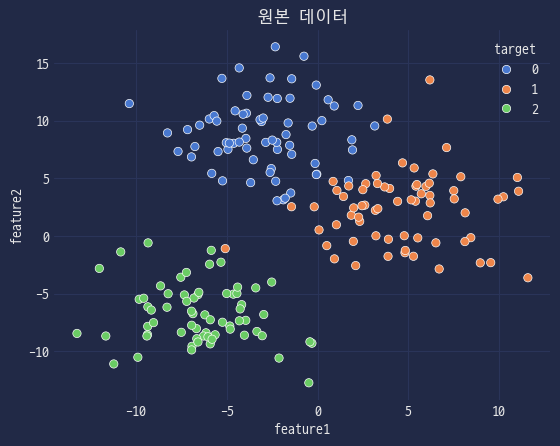

In [6]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='target', palette='muted')
plt.title('원본 데이터')
plt.show()

## 📏 KMeans

In [7]:
from sklearn.cluster import KMeans

# 클러스터링 객체 생성
# km = KMeans(n_clusters=3, random_state=42)
km = KMeans(random_state=42)

# 학습 및 클러스터링 결과 예측
kmeans_cluster = km.fit_predict(features)
kmeans_cluster.shape

(200,)

In [8]:
# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가

cluster_df['kmeans_cluster'] = kmeans_cluster
display(cluster_df.head(7))
display(km.cluster_centers_)

,feature1,feature2,target,kmeans_cluster
0,10.237202,3.394668,1,7
1,-10.368433,11.479994,0,2
2,-6.916368,-9.571873,2,1
3,-11.223880,-11.102501,2,4
4,-8.647721,-4.331303,2,6
5,-4.637746,-5.048999,2,6
6,-3.086281,9.918928,0,2


array([[ 1.06620365,  3.40189021],
       [-4.79326417, -8.38215484],
       [-4.54153055,  8.42959832],
       [ 5.61568613, -1.33847403],
       [-9.92735816, -7.48014241],
       [-0.2366273 , 12.0156644 ],
       [-6.35694593, -3.90202422],
       [ 6.78623206,  4.07335485]])

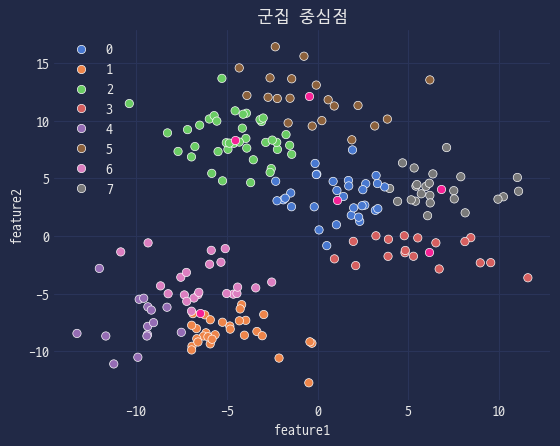

In [15]:
# 군집화 결과 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='kmeans_cluster', markers='o', palette='muted')
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1])
plt.title('군집 중심점')

plt.show()
# 개별 군집의 중심 좌표

### 🦾 Elbow 기법

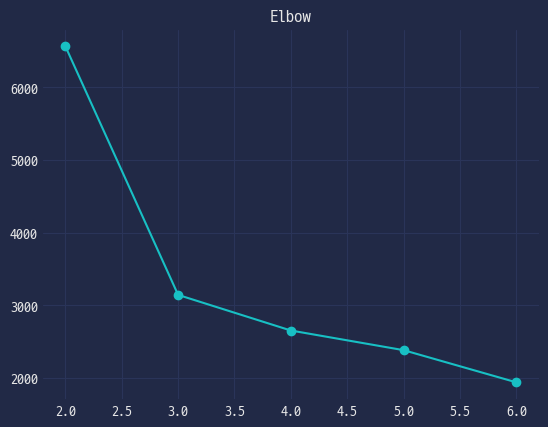

In [10]:
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
inertias = []
for i in range(2, 7):
    km = KMeans(i)
    km.fit(features)
    inertias.append(km.inertia_)

# sns.lineplot(x=list(range(2, 7)), y=inertias)
plt.plot(range(2, 7), inertias, marker='o')
plt.title('Elbow')
plt.show()

### 실루엣 분석

In [84]:
# 개별 실루엣 계수 (군집 평가 지표)


In [85]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인


In [86]:
# 평균 실루엣 계수


In [87]:
# 최적의 실루엣 찾기


# DBSCAN

### 데이터 준비

In [88]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


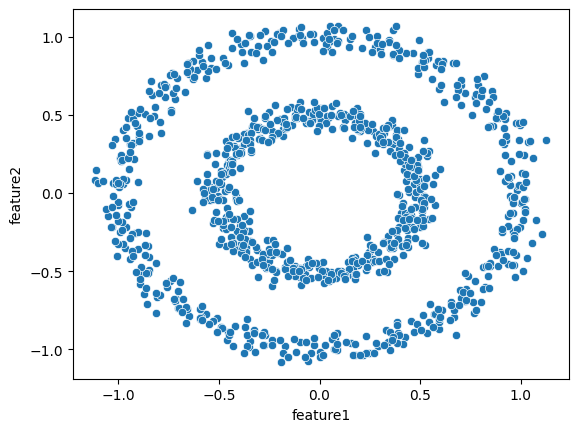

In [89]:
sns.scatterplot(data=df, x='feature1', y='feature2');

### k-means clustering

In [90]:
from sklearn.cluster import KMeans

# 클래스로 객체 생성
km = KMeans(n_clusters=2, random_state=0)

# 클러스터링
df['kmeans'] = km.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


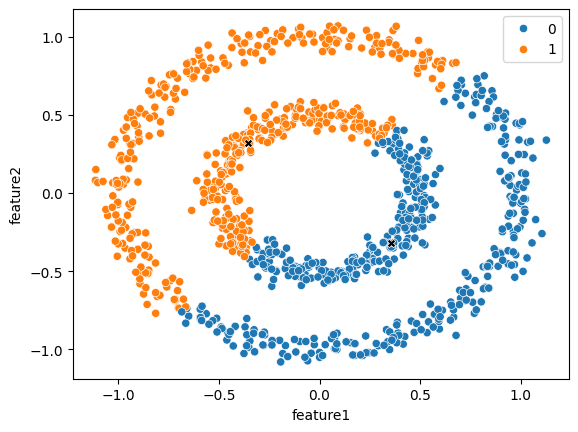

In [91]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans');
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1],
                marker='X', color='k');

### DBSCAN